### IMPORT LIBRARIES

In [444]:
import pandas as pd
from glob import glob
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import math

# Relevant Data Sources and Collection

In [383]:
#Data Sources
files = glob('Telco*')
files

['telco_churn_cleaned.csv',
 'Telco_customer_churn.csv',
 'Telco_customer_churn_demographics.csv',
 'Telco_customer_churn_location.csv',
 'Telco_customer_churn_population.csv',
 'Telco_customer_churn_services.csv',
 'Telco_customer_churn_status.csv']

### Read All Data

In [385]:
#Display the columns in each file
for file in files:
    df = pd.read_csv(file)
    cols_in_df = df.columns.tolist()
    print("Columns in file: ", file, "are ", cols_in_df)
    print()

Columns in file:  telco_churn_cleaned.csv are  ['Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Gender', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'CustomerID', 'Age', 'Under 30', 'Married', 'Number of Dependents', 'ID', 'Population', 'Quarter', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Device Protection Plan', 'Premium Tech Support', 'Streaming Music', 'Unlimited Data', 'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Category', 'Contract_One year', 'Contract_Two year', 'Payment Method_Credit card (automatic)', 'Payment

### Data combination from sources and compatibility

In [387]:
#Customer ID and Zip code will be used to merge the files
#However, the CustomerID column in 'Telco_customer_churn' does not match the Customer ID in other tables.
#Rename the CustomerID column in 'Telco_customer_churn' to Customer ID (with space in between the words).
df = pd.read_csv('Telco_customer_churn.csv')
df = df.rename(columns = {'CustomerID' : 'Customer ID'})
print("Columns in Telco_customer_churn file are: ", df.columns.tolist())

Columns in Telco_customer_churn file are:  ['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [389]:
#Now that the Primary key columns match. Lets merge all 6 files
for file in files:
    temp = pd.read_csv(file)
    if "Customer ID" in temp.columns.tolist():
        df = pd.merge(df, temp, on = "Customer ID", how = "left", suffixes = ('', '_remove'))
    else:
        df = pd.merge(df, temp, on = "Zip Code", how = "left", suffixes = ('', '_remove'))

#remove duplicate columns
df.drop([i for i in df.columns if 'remove' in i], axis = 1, inplace=True)

cols_in_df = df.columns.tolist()

print("The Total Number of Columns: ", len(cols_in_df))
print("Columns in the Merged Dataframe: ", cols_in_df)
df.head()

The Total Number of Columns:  76
Columns in the Merged Dataframe:  ['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'CustomerID', 'Age', 'Under 30', 'Married', 'Number of Dependents', 'ID', 'Population', 'Quarter', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Device Protection Plan', 'Premium Tech Support', 'Streaming Music', 'Unlimited Data', 'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Customer Statu

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Location ID,Service ID,Referred a Friend,Offer,Internet Type,Status ID
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,False,False,False,False,PZZUIT6837,ZLZTZWPWE3351,No,NaN,DSL,SUDNGT6444
1,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,False,False,False,False,PZZUIT6837,ZLZTZWPWE3351,No,NaN,DSL,SUDNGT6444
2,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,False,False,False,False,PZZUIT6837,ZLZTZWPWE3351,No,NaN,DSL,SUDNGT6444
3,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,False,False,False,False,PZZUIT6837,ZLZTZWPWE3351,No,NaN,DSL,SUDNGT6444
4,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,False,False,False,False,PZZUIT6837,ZLZTZWPWE3351,No,NaN,DSL,SUDNGT6444


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30347 entries, 0 to 30346
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Customer ID                             30347 non-null  object 
 1   Count                                   30347 non-null  int64  
 2   Country                                 30347 non-null  object 
 3   State                                   30347 non-null  object 
 4   City                                    30347 non-null  object 
 5   Zip Code                                30347 non-null  int64  
 6   Lat Long                                30347 non-null  object 
 7   Latitude                                30347 non-null  float64
 8   Longitude                               30347 non-null  float64
 9   Gender                                  30347 non-null  object 
 10  Senior Citizen                          30347 non-null  ob

In [393]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Age,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score
count,30347.0,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,...,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.000000,30347.00000
mean,1.0,93360.042607,36.101131,-119.648685,32.375424,64.772777,0.265661,58.703167,4399.816984,46.524632,...,1.948199,0.442130,0.458331,0.241631,0.462913,1.994044,6.910073,748.305174,0.251901,3.24612
std,0.0,1901.808194,2.458341,2.160626,24.546055,30.054699,0.441692,21.539995,1183.375266,16.761993,...,3.000355,0.345470,0.308999,0.240145,0.299052,7.960719,25.224072,846.529815,0.239425,1.20179
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,1.0,91941.000000,33.991782,-121.646924,9.000000,35.650000,0.000000,40.000000,3464.000000,32.000000,...,0.000000,0.112676,0.182837,0.035294,0.173134,0.000000,0.000000,69.930000,0.048874,3.00000
50%,1.0,93308.000000,35.480896,-119.194488,29.000000,70.350000,0.000000,61.000000,4528.000000,46.000000,...,0.000000,0.394366,0.457291,0.200000,0.518408,0.000000,0.000000,399.620000,0.174654,3.00000
75%,1.0,95303.000000,38.065359,-117.991372,55.000000,89.850000,1.000000,75.000000,5379.000000,60.000000,...,3.000000,0.760563,0.726545,0.317647,0.712438,0.000000,0.000000,1191.100000,0.399649,4.00000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000,80.000000,...,11.000000,1.000000,1.000000,1.000000,1.000000,49.790000,150.000000,3564.720000,1.000000,5.00000


In [395]:
df.shape

(30347, 76)

# Data Preprocessing

### Handle Duplicate records

In [397]:
# Drop exact duplicate rows
df.drop_duplicates(inplace=True)

# Drop duplicates based on 'Customer ID' if needed (optional)
df.drop_duplicates(subset='Customer ID', keep='first', inplace=True)

print("Data shape after dropping duplicates:", df.shape)
df.head()

Data shape after dropping duplicates: (7043, 76)


,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Location ID,Service ID,Referred a Friend,Offer,Internet Type,Status ID
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,False,False,False,False,PZZUIT6837,ZLZTZWPWE3351,No,NaN,DSL,SUDNGT6444
5,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,False,False,False,False,CKNALR2542,GXJVSQIYH4715,No,NaN,Fiber Optic,KZSZDV8891
10,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,False,False,False,False,VCQKYE1638,KDUHHRQBI5663,No,NaN,Cable,EPTIUU1269
15,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,False,True,False,False,SNLISG8671,WXXQTNEZW3786,No,Offer C,Fiber Optic,PAJIVH8196
20,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,False,False,False,False,YTSGZA8582,LTNFDWAMC2575,No,NaN,Fiber Optic,RXFOMV1173


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 30342
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Customer ID                             7043 non-null   object 
 1   Count                                   7043 non-null   int64  
 2   Country                                 7043 non-null   object 
 3   State                                   7043 non-null   object 
 4   City                                    7043 non-null   object 
 5   Zip Code                                7043 non-null   int64  
 6   Lat Long                                7043 non-null   object 
 7   Latitude                                7043 non-null   float64
 8   Longitude                               7043 non-null   float64
 9   Gender                                  7043 non-null   object 
 10  Senior Citizen                          7043 non-null   object 


In [401]:
#Handling Missing Values
#From the analysis above, only four columns have missing data: Churn Reason, 
# Offer, Internet Type, and Churn Category.

# Replace missing values in 'Internet Type' and 'Offer' with 'None'
df["Internet Type"].fillna("None", inplace = True)
df["Offer"].fillna("None", inplace = True)

# replacing na values in "Churn Category" with "Not Applicable"
df["Churn Category"].fillna("Not Applicable", inplace = True)

# replacing na values in "Churn Reason" with "Not Churned"
df["Churn Reason"].fillna("Not Churned", inplace = True)

# Confirm replacements
print(df[["Internet Type", "Offer", "Churn Category", "Churn Reason"]].isnull().sum())

Internet Type     0
Offer             0
Churn Category    0
Churn Reason      0
dtype: int64


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 30342
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Customer ID                             7043 non-null   object 
 1   Count                                   7043 non-null   int64  
 2   Country                                 7043 non-null   object 
 3   State                                   7043 non-null   object 
 4   City                                    7043 non-null   object 
 5   Zip Code                                7043 non-null   int64  
 6   Lat Long                                7043 non-null   object 
 7   Latitude                                7043 non-null   float64
 8   Longitude                               7043 non-null   float64
 9   Gender                                  7043 non-null   object 
 10  Senior Citizen                          7043 non-null   object 


### Drop Irrelevant Columns

In [405]:
# Identify columns that are redundant or unnecessary
columns_to_drop = [
    'Lat Long', 'Latitude', 'Longitude', 
    'Count', 'Service ID', 'Status ID', 'Location ID', 
    'Referred a Friend', 'Senior Citizen'
]
# Drop irrelevant columns in the dataframe
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Confirm shape and remaining columns
print("Shape after dropping:", df.shape)
print("Remaining columns:", df.columns.tolist())


Shape after dropping: (7043, 67)
Remaining columns: ['Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Gender', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'CustomerID', 'Age', 'Under 30', 'Married', 'Number of Dependents', 'ID', 'Population', 'Quarter', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Device Protection Plan', 'Premium Tech Support', 'Streaming Music', 'Unlimited Data', 'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Category', 'Contract_One year', 'Contract_Two year', 'Payment Method

## Data Transformation & Feature Engineering

In [407]:
# Label encode binary columns
# Convert binary (yes/no or male/female) values into numerical 0/1 so models can use them.
# Gender - Male (0), Female (1)
# Senior, Partner, Dependents, Paperless Billing - No (0), Yes (1)
label_enc_cols = ['Gender', 'Senior', 'Partner', 'Dependents', 'Paperless Billing']

le = LabelEncoder()
for col in label_enc_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [363]:
df.head()

,Customer ID,Country,State,City,Zip Code,Gender,Partner,Dependents,Tenure Months,Phone Service,...,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Offer,Internet Type
0,3668-QPYBK,United States,California,Los Angeles,90003,1,0,0,2,Yes,...,True,False,False,False,False,False,False,False,None,DSL
5,9237-HQITU,United States,California,Los Angeles,90005,0,0,1,2,Yes,...,False,True,False,False,False,False,False,False,None,Fiber Optic
10,9305-CDSKC,United States,California,Los Angeles,90006,0,0,1,8,Yes,...,False,False,False,False,False,False,False,False,None,Cable
15,7892-POOKP,United States,California,Los Angeles,90010,0,1,1,28,Yes,...,False,True,False,False,False,True,False,False,Offer C,Fiber Optic
20,0280-XJGEX,United States,California,Los Angeles,90015,1,0,1,49,Yes,...,False,True,False,False,False,False,False,False,None,Fiber Optic


In [409]:
# One-Hot Encoding Multi-Class Categorical Variables
# Transform multi-category columns into separate binary columns.
# Contract - Month-to-month, One year, Two year
# Payment Method - Bank transfer, Credit card, Mailed check, Electronic check
# Internet Type - DSL, Fiber Optic, Cable, None
# Offer - Various offers or "None"
df = pd.get_dummies(df, columns=['Contract', 'Payment Method', 'Internet Type', 'Offer'], drop_first=True)

In [411]:
df.head()

,Customer ID,Country,State,City,Zip Code,Gender,Partner,Dependents,Tenure Months,Phone Service,...,Payment Method_Electronic check,Payment Method_Mailed check,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E
0,3668-QPYBK,United States,California,Los Angeles,90003,1,0,0,2,Yes,...,False,True,True,False,False,False,False,False,False,False
5,9237-HQITU,United States,California,Los Angeles,90005,0,0,1,2,Yes,...,True,False,False,True,False,False,False,False,False,False
10,9305-CDSKC,United States,California,Los Angeles,90006,0,0,1,8,Yes,...,True,False,False,False,False,False,False,False,False,False
15,7892-POOKP,United States,California,Los Angeles,90010,0,1,1,28,Yes,...,True,False,False,True,False,False,False,True,False,False
20,0280-XJGEX,United States,California,Los Angeles,90015,1,0,1,49,Yes,...,False,False,False,True,False,False,False,False,False,False


In [413]:
# Normalizing/Scaling Numeric Columns
# Normalize values to a common scale (usually 0–1) using MinMaxScaler
numeric_cols = [
    'Tenure in Months', 'Monthly Charge',
    'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
    'Total Revenue', 'CLTV', 'Churn Score'
]

# Convert all non-numeric columns to numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
        
df.head()

,Customer ID,Country,State,City,Zip Code,Gender,Partner,Dependents,Tenure Months,Phone Service,...,Payment Method_Electronic check,Payment Method_Mailed check,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E
0,3668-QPYBK,United States,California,Los Angeles,90003,1,0,0,2,Yes,...,False,True,True,False,False,False,False,False,False,False
5,9237-HQITU,United States,California,Los Angeles,90005,0,0,1,2,Yes,...,True,False,False,True,False,False,False,False,False,False
10,9305-CDSKC,United States,California,Los Angeles,90006,0,0,1,8,Yes,...,True,False,False,False,False,False,False,False,False,False
15,7892-POOKP,United States,California,Los Angeles,90010,0,1,1,28,Yes,...,True,False,False,True,False,False,False,True,False,False
20,0280-XJGEX,United States,California,Los Angeles,90015,1,0,1,49,Yes,...,False,False,False,True,False,False,False,False,False,False


In [371]:
# Feature Engineering Code

# List of service-related columns
service_cols = [
    'phone_service', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection_plan',
    'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music'
]

# Convert all to lowercase and underscores if needed
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Count 'Yes' values across these columns
df['total_services_subscribed'] = df[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# Has dependents
df['has_dependents'] = df['number_of_dependents'].apply(lambda x: 1 if x > 0 else 0)

# Heavy Data User Flag
df['heavy_data_user'] = df['avg_monthly_gb_download'].apply(lambda x: 1 if x > 80 else 0)


# Preview new features
df[['total_services_subscribed', 'has_dependents', 'heavy_data_user']].head(10)



,total_services_subscribed,has_dependents,heavy_data_user
0,3,0,0
5,1,1,0
10,6,1,0
15,7,1,0
20,7,1,0
25,3,0,0
30,2,0,0
35,1,0,0
40,6,1,0
45,1,0,0


# Data Quality Assessment + Bias & Ethics

In [415]:
# Data Quality Metrics
# Check Missing Values and Duplicates

# Missing values
print(df.isnull().sum().sort_values(ascending=False))

# Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

Customer ID                        0
Customer Status                    0
Internet Type_DSL                  0
Payment Method_Mailed check        0
Payment Method_Electronic check    0
                                  ..
CLTV                               0
Churn Score                        0
Churn Value                        0
Churn Label                        0
Offer_Offer E                      0
Length: 76, dtype: int64
Duplicate rows found: 0


## Bias Detection and Ethical Considerations

In [417]:
# Check Gender Churn Bias
# Churn rate by gender
# Gender - Male (0), Female (1)
gender_churn = df.groupby('Gender')['Churn Value'].mean()
print("Churn Rate by Gender:\n", gender_churn)

Churn Rate by Gender:
 Gender
0    0.269209
1    0.261603
Name: Churn Value, dtype: float64


# Output the Cleaned Dataset

In [421]:
# Save updated dataset
df.to_csv("telco_churn_cleaned.csv", index=False)

# Exploratory Data Analysis

In [423]:
# Display all column names and details.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 30342
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Customer ID                             7043 non-null   object 
 1   Country                                 7043 non-null   object 
 2   State                                   7043 non-null   object 
 3   City                                    7043 non-null   object 
 4   Zip Code                                7043 non-null   int64  
 5   Gender                                  7043 non-null   int32  
 6   Partner                                 7043 non-null   int32  
 7   Dependents                              7043 non-null   int32  
 8   Tenure Months                           7043 non-null   int64  
 9   Phone Service                           7043 non-null   object 
 10  Multiple Lines                          7043 non-null   object 


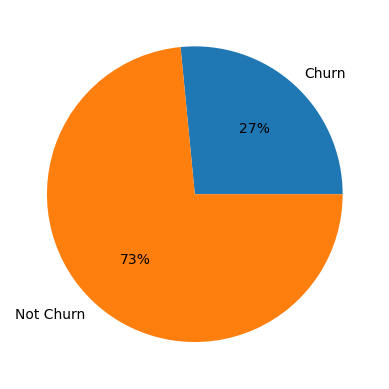

In [425]:
# Univariate Analysis
# Distribution of target label - "Churn"
counts = [(df["Churn Value"] == 1).sum(), (df["Churn Value"] == 0).sum()]
plt.pie(counts, labels = ["Churn", "Not Churn"], autopct='%.0f%%')
plt.show()

In [438]:
# Select categorical columns and drop irrelevant ones
categorical_columns = df.dtypes[df.dtypes == "object"].index.drop(
    ["Churn Label", "Churn Reason", "City", "CustomerID", "Customer ID","Country", "State", "Total Charges", "Population"]
)

cat_cols = df[categorical_columns]

# Dynamically calculate rows & columns based on number of plots
n_cols = 4
n_rows = math.ceil(len(cat_cols.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), dpi=500)
axes = axes.flatten()

fig.suptitle("Churn by Category", fontsize=25, fontweight="bold", y=1.02)

# Create a bar plot for each categorical feature
for i, col in enumerate(cat_cols.columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue="Churn Label", ax=ax, palette="Set2")
    ax.set_title(f"Churn by {col}", fontsize=13)
    ax.legend(frameon=True, facecolor="inherit", shadow=True)
    ax.tick_params(axis='x', rotation=45)

    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1.5)
plt.show()

In [429]:
# Analysis of the reasons customers churn
reasons = df["Churn Reason"][df["Churn Reason"].notna()]
reasons = reasons.value_counts().to_frame()
reasons.index.name = "Churn Reason"
reasons.columns = ["counts"]
reasons = reasons.assign(percent=lambda x: x / reasons["counts"].sum())

formater = lambda x: f"{x:.2%}"
reasons["percent"] = reasons.percent.apply(formater)
reasons.reset_index(inplace=True)
reasons

,Churn Reason,counts,percent
0,Not Churned,5174,73.46%
1,Attitude of support person,192,2.73%
2,Competitor offered higher download speeds,189,2.68%
3,Competitor offered more data,162,2.30%
4,Don't know,154,2.19%
5,Competitor made better offer,140,1.99%
6,Attitude of service provider,135,1.92%
7,Competitor had better devices,130,1.85%
8,Network reliability,103,1.46%
9,Product dissatisfaction,102,1.45%


# References
### Aaditya Bansal. June 8, 2023. Telecommunications Industry Customer churn dataset. Kaggle. https://www.kaggle.com/datasets/aadityabansalcodes/telecommunications-industry-customer-churn-dataset/data### Geeks for Geeks Team. August 2, 2024. How to use Glob() function to find files recursively in Python? Geeks for Geeks. https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/
### Kurtis Pykes. Jan 15, 2025. Data Preprocessing: A Complete Guide with Python Examples. Data Camp. https://www.datacamp.com/blog/data-preprocessing### Python Geeks Team. N.d. Data Preprocessing in Machine Learning. Python Geeks. https://pythongeeks.org/data-preprocessing-in-machine-learning/


